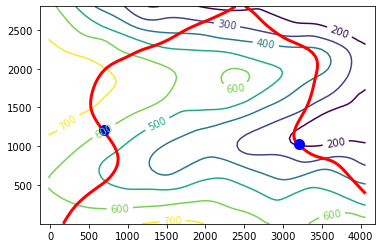

In [1]:
import sys, os
sys.path.append(os.path.abspath('../functions'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from enu2sdp import enu2sdp
from outcrop_trace import outcrop_trace

# Read the DEM grid
XG = np.loadtxt(os.path.abspath('../data/ch5-3/XG.txt'))
YG = np.loadtxt(os.path.abspath('../data/ch5-3/YG.txt'))
ZG = np.loadtxt(os.path.abspath('../data/ch5-3/ZG.txt'))

# Contour the terrain
cval = np.linspace(200,700,6)
cp = plt.contour(XG,YG,ZG,cval)
plt.clabel(cp, inline=True, fontsize=10, fmt="%d")

w_strike, w_dip = np.radians([20, 22])
e_strike, e_dip = np.radians([160, 22])

WT = enu2sdp(w_strike, w_dip)
ET = enu2sdp(e_strike, e_dip)

cval = 0 # Contour only CG zero value
wp = np.array([692.0, 1212.0, 600.0])  # Western contact
ep = np.array([3203.0, 1031.0, 200.0]) # Eastern contact

W_DG = outcrop_trace(WT, wp, XG, YG, ZG)
E_DG = outcrop_trace(ET, ep, XG, YG, ZG)

cp = plt.contour(XG, YG, W_DG, cval, colors='red', linewidths=3)
cp = plt.contour(XG, YG, E_DG, cval, colors='red', linewidths=3)

plt.plot(wp[0],wp[1],'bo',markersize=10)
plt.plot(ep[0],ep[1],'bo',markersize=10)

# Make axes equal
plt.axis('equal');